In [19]:
from sklearn import preprocessing, svm, neighbors
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, svm, utils
from scipy.io import loadmat
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [20]:
ST = [624,46,64,1350,280,10,1024,39,730,136,836,60]

MS = [1.32,0.61,1.89,0.87,1.12,2.76,1.13,1.38,0.96,1.62,1.58,0.60]

Age = [51.0,42.5,54.6,54.1,49.5,55.3,43.4,42.8,58.4,52.0,45.0,64.5]

In [35]:
features = np.transpose([MS,Age])
Class = np.transpose(np.log(ST))

#features are X and Labels are Y
x = np.array(features)

#scaling the data (normalizing)
# x = preprocessing.scale(x)

y = np.array(Class)


#testing and training

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.0)

clf = LinearRegression(n_jobs=-1)
clf.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [36]:
beta = []
beta.append(clf.intercept_)
beta.append(clf.coef_[0])
beta.append(clf.coef_[1])

In [37]:
print('Coefficients: \n', clf.coef_)
print('intercept: \n', clf.intercept_)
#print(beta)
Ymodel = []
for row in features:
    Ymodel.append(beta[0]+(beta[1]*row[0])+(beta[2]*row[1]))

error = y - Ymodel
print('error vector: \n',error)

Coefficients: 
 [-1.14910942 -0.02538273]
intercept: 
 8.021388218
error vector: 
 [ 1.22610566 -2.41302418 -0.30479144  1.55940238  0.15684892 -1.14359633
  1.31018759 -1.68567486  1.15715262  0.07272573  1.66505599 -1.60039211]


<IPython.core.display.Javascript object>


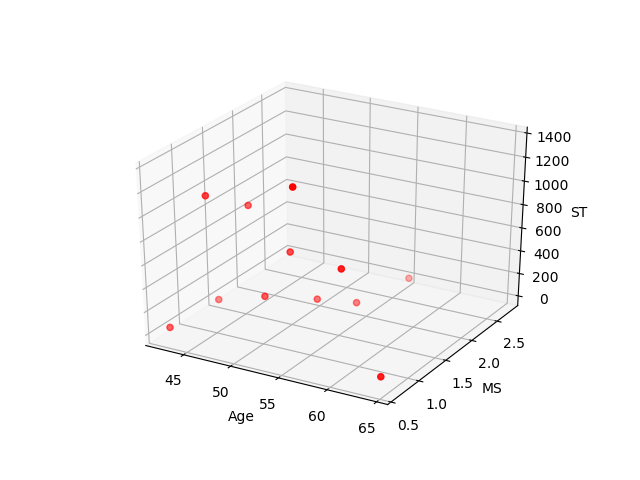

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Age, MS, ST, c='r', marker='o')

ax.set_xlabel('Age')
ax.set_ylabel('MS')
ax.set_zlabel('ST')

plt.show()

<IPython.core.display.Javascript object>


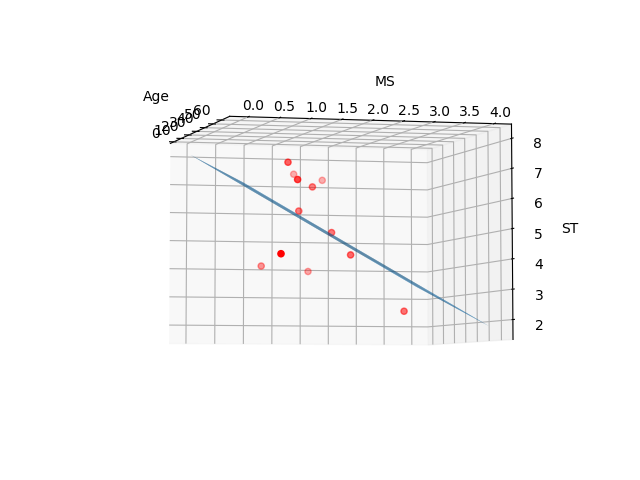

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Age, MS, np.transpose(Class), c='r', marker='o')

ax.set_xlabel('Age')
ax.set_ylabel('MS')
ax.set_zlabel('ST')
# create x,y
xx, yy = np.meshgrid(range(65), range(5))

# calculate corresponding z
z = (beta[1] * yy + beta[2] * xx + beta[0])
#z = (-0.499 * yy + -0.011 * xx + 3.4836)

# plot the surface

ax.plot_surface(xx, yy, z)
plt.show()